In [1]:
#imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix 

import acquire as ac
import prepare as pr

import warnings
warnings.filterwarnings("ignore")

1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample

In [2]:
# aquire the data 
df = ac.get_titanic_data()
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [3]:
# clean the data
df = pr.prep_titanic_2(df)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Southampton,0
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1
3,1,1,female,35.0,1,0,53.1000,Southampton,0
4,0,3,male,35.0,0,0,8.0500,Southampton,1


In [4]:
dumiies = pd.get_dummies(df['embark_town'], drop_first = False)
df = pd.concat([df, dumiies], axis = 1)

In [5]:
sex_dummy = pd.get_dummies(df['sex'], drop_first = False)
df = pd.concat([df, sex_dummy], axis = 1)
drop_cols = ['sex', 'embark_town']
df = df.drop(columns = drop_cols)

In [6]:
# split the data 
train, validate, test = pr.split_data(df, 'titanic')
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,Cherbourg,Queenstown,Southampton,female,male
474,0,3,22.0,0,0,9.8375,1,0,0,1,1,0
370,1,1,25.0,1,0,55.4417,0,1,0,0,0,1
573,1,3,30.0,0,0,7.7500,1,0,1,0,1,0
110,0,1,47.0,0,0,52.0000,1,0,0,1,0,1
167,0,3,45.0,1,4,27.9000,0,0,0,1,1,0


In [7]:
# drop object columns and create X_train of features only 
# and y_train of survived only. 
X_train = train.drop(columns=['survived'])
y_train = train['survived']

X_validate = validate.drop(columns=['survived'])
y_validate = validate['survived']

X_test = test.drop(columns=['survived'])
y_test = test['survived']

# check the shape
X_train.shape, X_validate.shape, X_test.shape

((498, 11), (214, 11), (179, 11))

In [8]:
baseline_prediction = y_train.mode()

In [9]:
pd.Series((baseline_prediction[0]), range(len(y_train)))

0      0
1      0
2      0
3      0
4      0
      ..
493    0
494    0
495    0
496    0
497    0
Length: 498, dtype: int64

In [10]:
# funciton created by brook
def establish_baseline(y_train):
    #  establish the value we will predict for all observations
    baseline_prediction = y_train.mode()

    # create a series of predictions with that value, 
    # the same length as our training set
    y_train_pred = pd.Series((baseline_prediction[0]), range(len(y_train)))

    # compute accuracy of baseline
    cm = confusion_matrix(y_train, y_train_pred)
    tn, fp, fn, tp = cm.ravel()

    accuracy = (tp+tn)/(tn+fp+fn+tp)
    return accuracy

In [11]:
establish_baseline(y_train)

0.6164658634538153

Now we can fit: 

In [12]:
# MAKE the thing
knn = KNeighborsClassifier()

# FIT the thing
knn.fit(X_train, y_train)

# USE the thing
y_train_pred = knn.predict(X_train)

2.Evaluate your results using the model score, confusion matrix, and classification report.

In [13]:
# accuracy: 
train_score = knn.score(X_train, y_train)
train_score

0.821285140562249

In [14]:
#confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], 
             columns=['Pred 0', 'Pred 1'])

,Pred 0,Pred 1
Actual 0,267,40
Actual 1,49,142


In [15]:
#classification report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       307
           1       0.78      0.74      0.76       191

    accuracy                           0.82       498
   macro avg       0.81      0.81      0.81       498
weighted avg       0.82      0.82      0.82       498



In [16]:
#classification report as a df
pd.DataFrame(classification_report(y_train, 
                                   y_train_pred, 
                                   output_dict=True)).T

,precision,recall,f1-score,support
0,0.844937,0.869707,0.857143,307.000000
1,0.780220,0.743455,0.761394,191.000000
accuracy,0.821285,0.821285,0.821285,0.821285
macro avg,0.812578,0.806581,0.809268,498.000000
weighted avg,0.820116,0.821285,0.820420,498.000000


3.  Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [17]:
tn, fp, fn, tp = cm.ravel()

accuracy = (tp + tn)/(tn + fp + fn + tp)

true_positive_rate = tp/(tp + fn)
false_positive_rate = fp/(fp + tn)
true_negative_rate = tn/(tn + fp)
false_negative_rate = fn/(fn + tp)

precision = tp/(tp + fp)
recall = tp/(tp + fn)
f1_score = 2*(precision*recall)/(precision+recall)

support_pos = tp + fn
support_neg = fp + tn

dict = {
    'metric' : ['accuracy'
                ,'true_positive_rate'
                ,'false_positive_rate'
                ,'true_negative_rate'
                ,'false_negative_rate'
                ,'precision'
                ,'recall'
                ,'f1_score'
                ,'support_pos'
                ,'support_neg']
    ,'score' : [accuracy
                ,true_positive_rate
                ,false_positive_rate
                ,true_negative_rate
                ,false_negative_rate
                ,precision
                ,recall
                ,f1_score
                ,support_pos
                ,support_neg]
}

pd.DataFrame(dict)

,metric,score
0,accuracy,0.821285
1,true_positive_rate,0.743455
2,false_positive_rate,0.130293
3,true_negative_rate,0.869707
4,false_negative_rate,0.256545
5,precision,0.780220
6,recall,0.743455
7,f1_score,0.761394
8,support_pos,191.000000
9,support_neg,307.000000


4. Run through steps 1-3 setting k to 10

In [21]:
def print_cm_metrics(cm):
    tn, fp, fn, tp = cm.ravel()

    accuracy = (tp + tn)/(tn + fp + fn + tp)

    true_positive_rate = tp/(tp + fn)
    false_positive_rate = fp/(fp + tn)
    true_negative_rate = tn/(tn + fp)
    false_negative_rate = fn/(fn + tp)

    precision = tp/(tp + fp)
    recall = tp/(tp + fn)
    f1_score = 2*(precision*recall)/(precision+recall)

    support_pos = tp + fn
    support_neg = fp + tn

    dict = {
        'metric' : ['accuracy'
                    ,'true_positive_rate'
                    ,'false_positive_rate'
                    ,'true_negative_rate'
                    ,'false_negative_rate'
                    ,'precision'
                    ,'recall'
                    ,'f1_score'
                    ,'support_pos'
                    ,'support_neg']
        ,'score' : [accuracy
                    ,true_positive_rate
                    ,false_positive_rate
                    ,true_negative_rate
                    ,false_negative_rate
                    ,precision
                    ,recall
                    ,f1_score
                    ,support_pos
                    ,support_neg]
    }

    return pd.DataFrame(dict)

In [18]:
# functino to fit and use the model create by brook:
def knn_fit_predict(k, X_train, y_train, X_validate):
    '''
    This function takes n_neighbors, X_train,  target  and X_val
    and returns knn, predictions for train set and validate set
    '''
    # MAKE the thing
    knn = KNeighborsClassifier(n_neighbors=k)

    # FIT the thing
    knn.fit(X_train, y_train)

    # USE the thing
    y_train_pred = knn.predict(X_train)
    y_validate_pred = knn.predict(X_validate)
    
    return knn, y_train_pred, y_validate_pred

In [19]:
# function to return accuacry, confusion matric, and report
def evaluate_clf(model, X, y, y_pred):
    '''
    This function can be used on any classification model
    It takes in a model, features, target and prediction
    and returns the accuracy, confusion matrix and classification report
    '''
    # model score
    accuracy = model.score(X, y)

    # confusion matrix
    cm = confusion_matrix(y, y_pred)
    cmdf = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], 
                       columns=['Pred 0', 'Pred 1'])

    # classification report
    crdf = pd.DataFrame(classification_report(y, y_pred, output_dict=True))
    
    # confusion matrix metrics
    metrics = print_cm_metrics(cm)
    
    return accuracy, cmdf, crdf, metrics

In [22]:
#using the functions we created above, and store what's returned in variables:
k = 10
knn, y_train_pred, y_validate_pred = knn_fit_predict(k, 
                                                     X_train, 
                                                     y_train, 
                                                     X_validate)
accuracy_t, cmdf_t, crdf_t, met_t = evaluate_clf(knn, X_train, y_train, y_train_pred)

accuracy_v, cmdf_v, crdf_v, met_v = evaluate_clf(knn, X_validate, y_validate, y_validate_pred)

In [23]:
print(f"""KNN where K = {k}

********Train Evaluation********

Accuracy: {accuracy_t}

Confusion Matrix:
{cmdf_t}

Classification Report:
{crdf_t}

Metrics: 
{met_t}
 
________________________________________________

********Validate Evaluation********

Accuracy: {accuracy_v}

Confusion Matrix:
{cmdf_v}

Classification Report:
{crdf_v}

Metrics: 
{met_v}

""")

KNN where K = 10

********Train Evaluation********

Accuracy: 0.7690763052208835

Confusion Matrix:
          Pred 0  Pred 1
Actual 0     277      30
Actual 1      85     106

Classification Report:
                    0           1  accuracy   macro avg  weighted avg
precision    0.765193    0.779412  0.769076    0.772303      0.770647
recall       0.902280    0.554974  0.769076    0.728627      0.769076
f1-score     0.828102    0.648318  0.769076    0.738210      0.759148
support    307.000000  191.000000  0.769076  498.000000    498.000000

Metrics: 
                metric       score
0             accuracy    0.769076
1   true_positive_rate    0.554974
2  false_positive_rate    0.097720
3   true_negative_rate    0.902280
4  false_negative_rate    0.445026
5            precision    0.779412
6               recall    0.554974
7             f1_score    0.648318
8          support_pos  191.000000
9          support_neg  307.000000
 
________________________________________________

***

5. Run through steps 1-3 setting k to 20

In [24]:
k = 20
knn, y_train_pred, y_validate_pred = knn_fit_predict(k, 
                                                     X_train, 
                                                     y_train, 
                                                     X_validate)
accuracy_t, cmdf_t, crdf_t, met_t = evaluate_clf(knn, X_train, y_train, y_train_pred)

accuracy_v, cmdf_v, crdf_v, met_v = evaluate_clf(knn, X_validate, y_validate, y_validate_pred)

In [25]:
print(f"""KNN where K = {k}

********Train Evaluation********

Accuracy: {accuracy_t}

Confusion Matrix:
{cmdf_t}

Classification Report:
{crdf_t}

Metrics: 
{met_t}
 
________________________________________________

********Validate Evaluation********

Accuracy: {accuracy_v}

Confusion Matrix:
{cmdf_v}

Classification Report:
{crdf_v}

Metrics: 
{met_v}

""")

KNN where K = 20

********Train Evaluation********

Accuracy: 0.7449799196787149

Confusion Matrix:
          Pred 0  Pred 1
Actual 0     273      34
Actual 1      93      98

Classification Report:
                    0           1  accuracy   macro avg  weighted avg
precision    0.745902    0.742424   0.74498    0.744163      0.744568
recall       0.889251    0.513089   0.74498    0.701170      0.744980
f1-score     0.811293    0.606811   0.74498    0.709052      0.732867
support    307.000000  191.000000   0.74498  498.000000    498.000000

Metrics: 
                metric       score
0             accuracy    0.744980
1   true_positive_rate    0.513089
2  false_positive_rate    0.110749
3   true_negative_rate    0.889251
4  false_negative_rate    0.486911
5            precision    0.742424
6               recall    0.513089
7             f1_score    0.606811
8          support_pos  191.000000
9          support_neg  307.000000
 
________________________________________________

***

What preforms better: 

In [27]:
metrics = []

for k in range(1,21):
    knn, y_train_pred, y_val_pred = knn_fit_predict(k, X_train, 
                                                    y_train, 
                                                    X_validate)
    train_acc = knn.score(X_train, y_train)
    val_acc = knn.score(X_validate, y_validate)
    
    output = {
            "k": k,
            "train_accuracy": train_acc,
            "validate_accuracy": val_acc
    }

    metrics.append(output)
    
eval_df = pd.DataFrame(metrics)
eval_df['difference'] = eval_df['train_accuracy'] - eval_df['validate_accuracy']

In [29]:
eval_df

,k,train_accuracy,validate_accuracy,difference
0,1,0.979920,0.626168,0.353751
1,2,0.847390,0.621495,0.225894
2,3,0.853414,0.626168,0.227245
3,4,0.809237,0.635514,0.173723
4,5,0.821285,0.640187,0.181098
5,6,0.817269,0.654206,0.163063
6,7,0.807229,0.644860,0.162369
7,8,0.789157,0.649533,0.139624
8,9,0.787149,0.663551,0.123597
9,10,0.769076,0.668224,0.100852


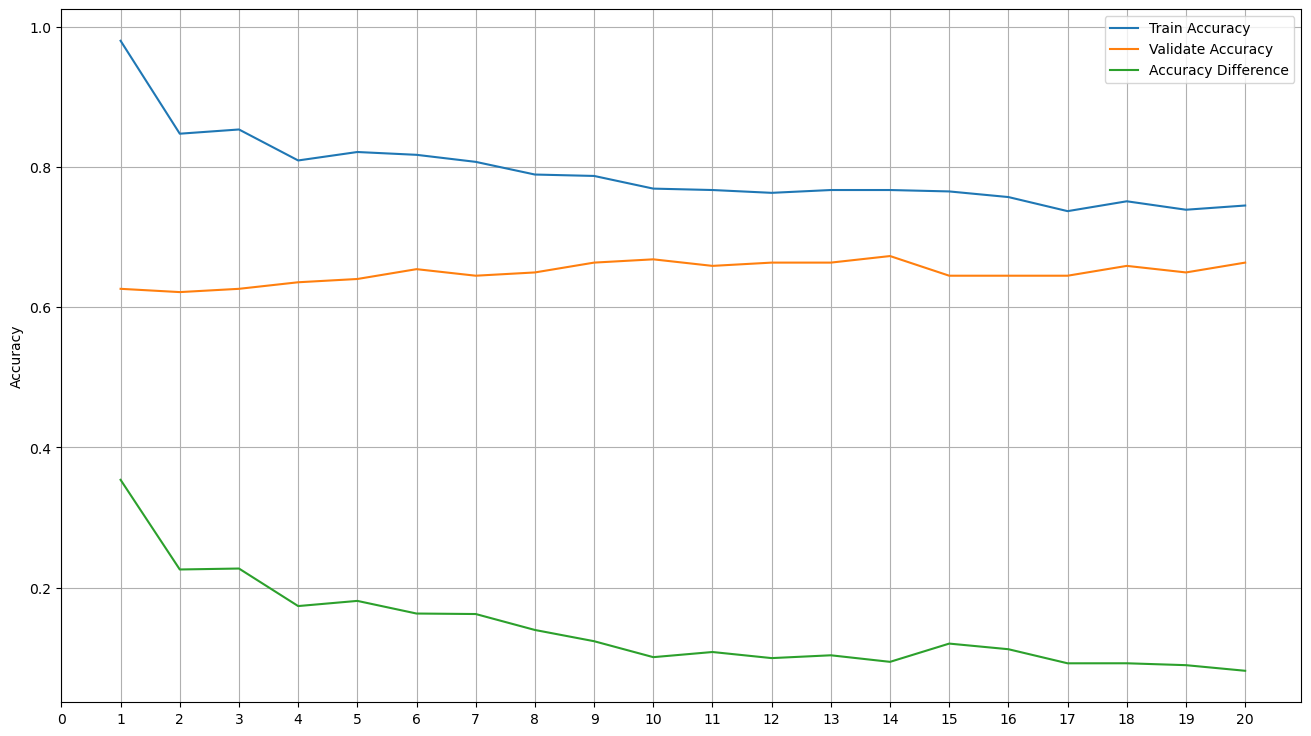

In [30]:
# plot the data
plt.figure(figsize=(16,9))
plt.plot(eval_df.k, eval_df.train_accuracy, label='Train Accuracy')
plt.plot(eval_df.k, eval_df.validate_accuracy, label='Validate Accuracy')
plt.plot(eval_df.k, eval_df.difference, label='Accuracy Difference')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(np.arange(0,21,1))
plt.grid()
plt.show()